Stock Portfolio Analysis

In [17]:
# Import libaries

import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
# from MCForecastTools import MCSimulation
%matplotlib inline

In [18]:
# Check dotenv loaded correctly

load_dotenv()

True

In [19]:
# Set current amount of shares data

shares_data = {
    "shares": [10, 201, 210, 156, 2, 50, 1, 1, 1, 1, 35]
}

# Set the tickers

tickers = ["TNXP", "SNDL", "HYLN", "GOEV", "COIN", "MNMD", "PLTR", "RIOT", "CHPT", "QS", "IDEX"]

# Create the shares DataFrame

df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data

df_shares

,shares
TNXP,10
SNDL,201
HYLN,210
GOEV,156
COIN,2
MNMD,50
PLTR,1
RIOT,1
CHPT,1
QS,1


In [20]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [21]:
# Verify that Alpaca key and secret were correctly loaded

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [22]:
# Create the Alpaca API object

alpaca = trade_api.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [27]:
# Format current date as ISO format

today = pd.Timestamp("2021-08-11", tz="America/New_York").isoformat()

In [28]:
# Set timeframe to one day ('1D') for the Alpaca API

timeframe = "1D"

In [29]:
# Get current price data for Stocks

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data

df_portfolio

CHPT                                   COIN       \
                           open     high    low  close   volume   open high   
2021-08-11 00:00:00-04:00  26.5  26.6829  24.33  25.06  7380147  282.5  294   

                                                       ...    SNDL          \
                                low   close    volume  ...    open    high   
2021-08-11 00:00:00-04:00  274.3501  278.41  13382381  ...  0.8165  0.8177   

                                                      TNXP                  \
                             low   close    volume    open    high     low   
2021-08-11 00:00:00-04:00  0.791  0.8095  55970782  0.7605  0.7605  0.7006   

                                             
                            close    volume  
2021-08-11 00:00:00-04:00  0.7149  14371999  

[1 rows x 55 columns]

In [30]:
# Fetch the current closing prices from the DataFrame

tnxp_price = float(df_portfolio["TNXP"]["close"])
sndl_price = float(df_portfolio["SNDL"]["close"])
hyln_price = float(df_portfolio["HYLN"]["close"])
goev_price = float(df_portfolio["GOEV"]["close"])
coin_price = float(df_portfolio["COIN"]["close"])
mnmd_price = float(df_portfolio["MNMD"]["close"])
pltr_price = float(df_portfolio["PLTR"]["close"])
riot_price = float(df_portfolio["RIOT"]["close"])
chpt_price = float(df_portfolio["CHPT"]["close"])
qs_price = float(df_portfolio["QS"]["close"])
idex_price = float(df_portfolio["IDEX"]["close"])

In [31]:
# Compute the current value in dollars of the stock portfolio

tnxp_value = tnxp_price * df_shares.loc["TNXP"]["shares"]
sndl_value = sndl_price * df_shares.loc["SNDL"]["shares"]
hyln_value = hyln_price * df_shares.loc["HYLN"]["shares"]
goev_value = goev_price * df_shares.loc["GOEV"]["shares"]
coin_value = coin_price * df_shares.loc["COIN"]["shares"]
mnmd_value = mnmd_price * df_shares.loc["MNMD"]["shares"]
pltr_value = pltr_price * df_shares.loc["PLTR"]["shares"]
riot_value = riot_price * df_shares.loc["RIOT"]["shares"]
chpt_value = chpt_price * df_shares.loc["CHPT"]["shares"]
qs_value = qs_price * df_shares.loc["QS"]["shares"]
idex_value = idex_price * df_shares.loc["IDEX"]["shares"]

# Print the current value of the portfolio

print(f"The current value of the {df_shares.loc['TNXP']['shares']} TNXP shares is ${tnxp_value:0.2f}")
print(f"The current value of the {df_shares.loc['SNDL']['shares']} SNDL shares is ${sndl_value:0.2f}")
print(f"The current value of the {df_shares.loc['HYLN']['shares']} HYLN shares is ${hyln_value:0.2f}")
print(f"The current value of the {df_shares.loc['GOEV']['shares']} GOEV shares is ${goev_value:0.2f}")
print(f"The current value of the {df_shares.loc['COIN']['shares']} COIN shares is ${coin_value:0.2f}")
print(f"The current value of the {df_shares.loc['MNMD']['shares']} MNMD shares is ${mnmd_value:0.2f}")
print(f"The current value of the {df_shares.loc['PLTR']['shares']} PLTR shares is ${pltr_value:0.2f}")
print(f"The current value of the {df_shares.loc['RIOT']['shares']} RIOT shares is ${riot_value:0.2f}")
print(f"The current value of the {df_shares.loc['CHPT']['shares']} CHPT shares is ${chpt_value:0.2f}")
print(f"The current value of the {df_shares.loc['QS']['shares']} QS shares is ${qs_value:0.2f}")
print(f"The current value of the {df_shares.loc['IDEX']['shares']} IDEX shares is ${idex_value:0.2f}")


The current value of the 10 TNXP shares is $7.15
The current value of the 201 SNDL shares is $162.71
The current value of the 210 HYLN shares is $1982.40
The current value of the 156 GOEV shares is $1240.20
The current value of the 2 COIN shares is $556.82
The current value of the 50 MNMD shares is $151.00
The current value of the 1 PLTR shares is $22.35
The current value of the 1 RIOT shares is $37.74
The current value of the 1 CHPT shares is $25.06
The current value of the 1 QS shares is $22.75
The current value of the 35 IDEX shares is $85.05


In [32]:
# Set the data for the shares value DataFrame

value_data = {
    "TNXP": [tnxp_value],
    "SNDL": [sndl_value],
    "HYLN": [hyln_value],
    "GOEV": [goev_value],
    "COIN": [coin_value],
    "MNMD": [mnmd_value],
    "PLTR": [pltr_value],
    "RIOT": [riot_value],
    "CHPT": [chpt_value],
    "QS": [qs_value],
    "IDEX": [idex_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,TNXP,SNDL,HYLN,GOEV,COIN,MNMD,PLTR,RIOT,CHPT,QS,IDEX
0,7.149,162.7095,1982.4,1240.2,556.82,151.0,22.35,37.74,25.06,22.75,85.05


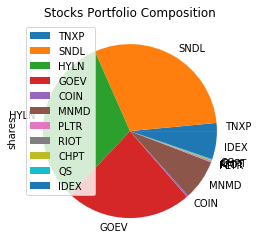

In [33]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

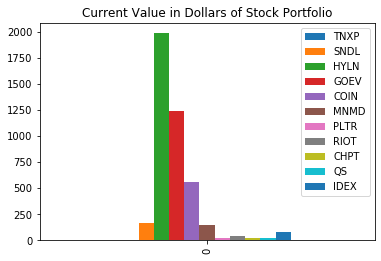

In [34]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")

In [37]:
total_portfolio_value = [tnxp_value,
                            sndl_value,
                            hyln_value,
                            goev_value,
                            coin_value,
                            mnmd_value,
                            pltr_value,
                            riot_value,
                            chpt_value,
                            qs_value,
                            idex_value
                        ]

In [41]:
sum(total_portfolio_value)

4293.228500000001